In [186]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
import neurolab as nl
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv('Climate_dataset_TS.csv')

In [188]:
print(df)

           date   meantemp   humidity  wind_speed  meanpressure
0    2017-01-01  15.913043  85.869565    2.743478     59.000000
1    2017-01-02  18.500000  77.222222    2.894444   1018.277778
2    2017-01-03  17.111111  81.888889    4.016667   1018.333333
3    2017-01-04  18.700000  70.050000    4.545000   1015.700000
4    2017-01-05  18.388889  74.944444    3.300000   1014.333333
..          ...        ...        ...         ...           ...
109  2017-04-20  34.500000  27.500000    5.562500    998.625000
110  2017-04-21  34.250000  39.375000    6.962500    999.875000
111  2017-04-22  32.900000  40.900000    8.890000   1001.600000
112  2017-04-23  32.875000  27.500000    9.962500   1002.125000
113  2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 5 columns]


In [189]:
encoder = preprocessing.LabelEncoder()
x_axis = encoder.fit_transform(df['date'])

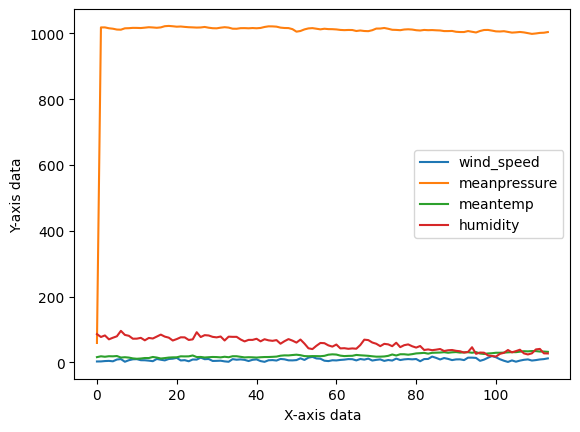

In [190]:
graph_data = df[['wind_speed', 'meanpressure', 'meantemp', 'humidity']]
for y_axis, y_label in zip(graph_data.T.values.tolist(), graph_data):
    plt.plot(x_axis, y_axis, label=y_label)
plt.legend(loc="center right")
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.show()

In [191]:
df['date'] = encoder.fit_transform(df['date'])
X = df[['date', 'wind_speed', 'meanpressure']]
y = df[['meantemp', 'humidity']]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)

In [194]:
# x_dim = []
# for val in X_train.T.values:
#     x_dim.append([val.min(), val.max()])
# print(x_dim)
# y_dim = []
# for val in y_train.T.values:
#     y_dim.append([val.min(), val.max()])
# print(y_dim)
# nn = nl.net.newff(x_dim,y_dim)

# error_progress = nn.train(X_train, y_train, epochs=100, show=20, lr=0.03)
# plt.figure()
# plt.plot(error_progress)
# plt.xlabel('Number of epochs')
# plt.ylabel('Training error')
# plt.title('Training error progress')
# plt.grid()
# plt.show()

In [199]:
regr = MLPRegressor(hidden_layer_sizes=(3,2), activation='identity', max_iter=10000).fit(X_train, y_train)
predict = regr.predict(X_test)
score = regr.score(X_test, y_test)
print(score)
for a,b in zip(predict, y_test.values.tolist()):
    print('predict:', a, 'actual:', b)


-2.7283541413780164
predict: [23.9277515  43.71264123] actual: [29.5, 38.625]
predict: [24.18172129 43.98685954] actual: [29.88888888888889, 40.66666666666666]
predict: [24.19630215 42.72949296] actual: [31.0, 34.5]
predict: [24.3916499  42.68640294] actual: [29.285714285714285, 36.85714285714285]
predict: [24.61338944 42.8248488 ] actual: [30.625, 37.625]
predict: [24.68878971 41.89075576] actual: [31.375, 35.125]
predict: [24.81049374 41.35319623] actual: [29.75, 33.75]
predict: [24.99824104 41.26322277] actual: [30.5, 29.75]
predict: [24.92523307 39.80552869] actual: [30.933333333333334, 31.866666666666667]
predict: [25.05349915 39.20941875] actual: [29.23076923076923, 46.0]
predict: [25.20460457 38.75657428] actual: [31.22222222222222, 26.0]
predict: [25.55926716 39.97287718] actual: [27.0, 29.875]
predict: [25.58362483 39.10370467] actual: [25.625, 29.375]
predict: [25.55702381 37.74244658] actual: [27.125, 21.125]
predict: [25.54990443 36.34259973] actual: [27.857142857142858, 19

c:\Users\serey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [196]:
last_row_x = [[X_test.iloc[-1]['date'], 0, 0]]
last_row_y = y_test.iloc[-1].values.tolist()
p = regr.predict(last_row_x)
print(last_row_y)
print(p)

[32.0, 27.142857142857142]
[[16.01180475 20.50679129]]


c:\Users\serey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [204]:
X2 = df[['date']]
y2 = df[['wind_speed', 'meanpressure']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, shuffle=False, test_size=0.25)
regr = MLPRegressor(hidden_layer_sizes=(1,2), activation='identity', max_iter=15000).fit(X2, y2)
predict = regr.predict(X2_test)
score = regr.score(X2_test, y2_test)
print(score)
for a,b in zip(predict, y2_test.values.tolist()):
    print('predict:', a, 'actual:', b)

-8.181859813150027
predict: [   8.19025792 1012.45740848] actual: [13.65, 1009.5]
predict: [   8.19155582 1012.75638282] actual: [8.844444444444445, 1009.0]
predict: [   8.19285372 1013.05535715] actual: [13.2, 1007.125]
predict: [   8.19415162 1013.35433148] actual: [10.585714285714284, 1007.1428571428572]
predict: [   8.19544952 1013.65330581] actual: [6.949999999999999, 1007.5]
predict: [   8.19674742 1013.95228014] actual: [9.0375, 1005.0]
predict: [   8.19804532 1014.25125447] actual: [9.2625, 1004.25]
predict: [   8.19934322 1014.5502288 ] actual: [6.9375, 1004.25]
predict: [   8.20064112 1014.84920314] actual: [14.32, 1007.2]
predict: [   8.20193902 1015.14817747] actual: [14.384615384615389, 1005.0]
predict: [   8.20323692 1015.4471518 ] actual: [13.577777777777776, 1002.8888888888888]
predict: [   8.20453483 1015.74612613] actual: [4.65, 1007.375]
predict: [   8.20583273 1016.04510046] actual: [8.337499999999999, 1010.375]
predict: [   8.20713063 1016.34407479] actual: [14.125